In [ ]:
/*use polars_core::prelude::*;
use polars_io::prelude::*;
use std::fs::File;

fn example() -> PolarsResult<DataFrame> {
    CsvReader::from_path("iris_csv")?
            .has_header(true)
            .finish()
}

In [2]:
// Set up required dependencies
:dep ndarray = "0.15.6"

In [9]:
:dep plotly = { version = ">=0.8.0", features = ["plotly_ndarray"]}

In [ ]:
// May take a few minutes to load polars crate

In [4]:
:dep polars = { version = ">=0.26.0", features = ["lazy", "csv-file", "strings", "dtype-duration", "dtype-categorical", "concat_str", "rank", "lazy_regex", "ndarray"]}

In [10]:
// Import external crates needed
extern crate ndarray;
extern crate plotly;
extern crate polars;

In [40]:
// Specify imports/modules required
use ndarray::{Array, Ix1, Ix2};
//use ndarray::Array;
//Check - may not need ndarray prelude
//use ndarray::prelude::*;
use polars::prelude::*;
use polars::frame::DataFrame;
use plotly::common::{
    ColorScale, ColorScalePalette, DashType, Fill, Font, Line, LineShape, Marker, Mode, Title,
};
use plotly::layout::{Axis, BarMode, Layout, Legend, TicksDirection};
use plotly::{Plot, Scatter, Bar};

In [41]:
// Reading .csv file
let df = CsvReader::from_path("ace_para_count.csv").unwrap().finish().unwrap();

In [42]:
df

shape: (6, 1)
┌───────┐
│ count │
│ ---   │
│ i64   │
╞═══════╡
│ 7     │
├╌╌╌╌╌╌╌┤
│ 1     │
├╌╌╌╌╌╌╌┤
│ 1     │
├╌╌╌╌╌╌╌┤
│ 1     │
├╌╌╌╌╌╌╌┤
│ 2     │
├╌╌╌╌╌╌╌┤
│ 1     │
└───────┘

In [43]:
// Switch Polars dataframe into 2D array
// Ensure "ndarray" was added as one of the features for polars under dependencies

//Example from documentation:
//let df = DataFrame::new(vec![a, b]).unwrap();
//let ndarray = df.to_ndarray::<Float64Type>().unwrap();
//println!("{:?}", ndarray);

let ndarray = df.to_ndarray::<Float64Type>().unwrap();
println!("{:?}", ndarray);

[[7.0],
 [1.0],
 [1.0],
 [1.0],
 [2.0],
 [1.0]], shape=[6, 1], strides=[1, 6], layout=CFcf (0xf), const ndim=2


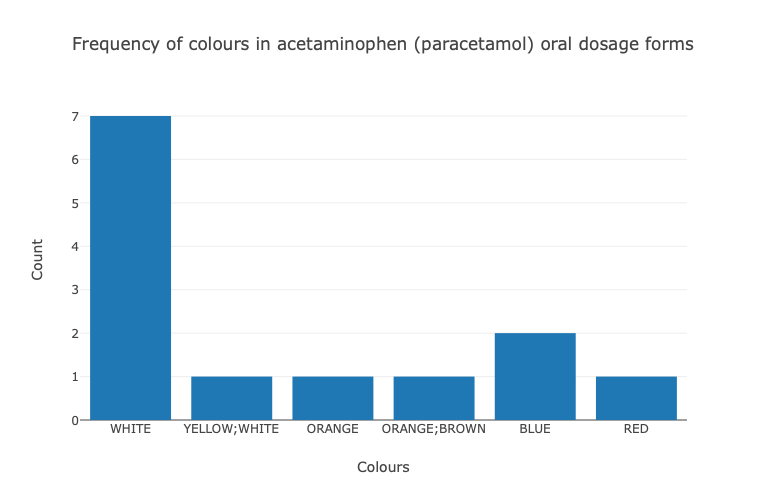

In [79]:
// Sample method:
// Use vec! macro to create new vectors to hold x variables (words as strings) for plotting
// Manually input the colour names (as ndarray is only for numbers)
let x = vec!["WHITE", "YELLOW;WHITE", "ORANGE", "ORANGE;BROWN", "BLUE", "RED"];
// Plot using ndarray, which is supported by Plotly.rs (Polars not supported yet)
// Convert ndarray (holding counts as y variables) into vector for plotting
let y = ndarray.column(0).to_vec();

// Use trace as a graph module,
// choose which type of plots is needed with x & y variables called
// Graph options e.g. Scatter, Line or Bar
let trace = Bar::new(x, y);

// Set plot variable as mutable and initiate a plot
let mut plot = Plot::new();
// Add trace (graph) into the plot variable
plot.add_trace(trace);

// Specify the specs for plot
let layout = Layout::new()
    // Choose height of graph
    .height(500)
    // Name x-axis
    .x_axis(Axis::new().title(Title::new("Colours")))
    // Name y-axis
    .y_axis(Axis::new().title(Title::new("Count")))
    // Add title of graph
    .title(Title::new("Frequency of colours in acetaminophen (paracetamol) oral dosage forms"));

// Set the layout of the plot
plot.set_layout(layout);

// Display the plot in Jupyter Lab format 
// note for Jupyter Notebook - plot.notebook_display();
plot.lab_display();
format!("EVCXR_BEGIN_CONTENT application/vnd.plotly.v1+json\n{}\nEVCXR_END_CONTENT", plot.to_json())